In [19]:
!wget http://cb.lk/covid_19

--2022-01-07 18:19:20--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-01-07 18:19:21--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-01-07 18:19:21--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-01

In [20]:
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CovidDataset/Val/Covid/4-x-day1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [31]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [33]:
#CNN based model in Keras

model = Sequential()

model.add(Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape = (224,224,3)))
model.add(Conv2D(64 , (3,3) , activation='relu' ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3) ,activation= 'relu'))
model.add(MaxPooling2D( pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128 , (3,3) , activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1 , activation='sigmoid'))

model.compile( loss = keras.losses.binary_crossentropy , optimizer = 'adam' , metrics = ['accuracy'])



In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [35]:
# Train from scratch
train_datagen = image.ImageDataGenerator( 
    rescale= 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = image.ImageDataGenerator(rescale = 1./255)



In [36]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

Found 224 images belonging to 2 classes.


In [37]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [38]:
validation_generator = test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
    
)

Found 60 images belonging to 2 classes.


In [39]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 7,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/20
7/7 [==============================] - 13s 2s/step - loss: 1.3969 - accuracy: 0.5089 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 0.6936 - accuracy: 0.6116 - val_loss: 0.6891 - val_accuracy: 0.8833
Epoch 3/20
7/7 [==============================] - 11s 2s/step - loss: 0.6321 - accuracy: 0.6920 - val_loss: 0.5668 - val_accuracy: 0.9000
Epoch 4/20
7/7 [==============================] - 11s 2s/step - loss: 0.5237 - accuracy: 0.7545 - val_loss: 0.4043 - val_accuracy: 0.9333
Epoch 5/20
7/7 [==============================] - 11s 2s/step - loss: 0.3682 - accuracy: 0.8527 - val_loss: 0.2467 - val_accuracy: 0.9333
Epoch 6/20
7/7 [==============================] - 11s 2s/step - loss: 0.2088 - accuracy: 0.9196 - val_loss: 0.1148 - val_accuracy: 0.9500
Epoch 7/20
7/7 [==============================] - 11s 2s/step - loss: 0.2133 - accuracy: 0.9241 - val_loss: 0.1062 - val_accuracy: 0.9500
Epoch 8/20
7/7 [==================

In [40]:
hist.history

{'accuracy': [0.5089285969734192,
  0.6116071343421936,
  0.6919642686843872,
  0.7544642686843872,
  0.8526785969734192,
  0.9196428656578064,
  0.9241071343421936,
  0.9107142686843872,
  0.9196428656578064,
  0.9419642686843872,
  0.9642857313156128,
  0.9285714030265808,
  0.9776785969734192,
  0.96875,
  0.96875,
  0.9776785969734192,
  0.96875,
  0.9464285969734192,
  0.9732142686843872,
  0.9776785969734192],
 'loss': [1.3969050645828247,
  0.6935691833496094,
  0.6321313977241516,
  0.5236878395080566,
  0.36824941635131836,
  0.2087632268667221,
  0.21327878534793854,
  0.25409001111984253,
  0.20378322899341583,
  0.14735428988933563,
  0.10322431474924088,
  0.2295621931552887,
  0.11681108176708221,
  0.12723834812641144,
  0.09202487021684647,
  0.06442080438137054,
  0.12012831121683121,
  0.10530780255794525,
  0.07910222560167313,
  0.07622171193361282],
 'val_accuracy': [0.5,
  0.8833333253860474,
  0.8999999761581421,
  0.9333333373069763,
  0.9333333373069763,
  0.94

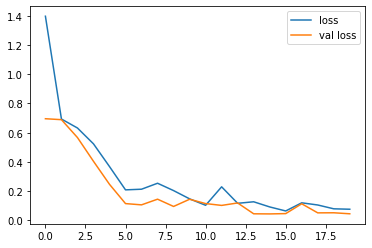

In [41]:
logs = hist.history
plt.plot(logs['loss'],label = 'loss')
plt.plot(logs['val_loss'], label = 'val loss')
plt.legend()
plt.show()

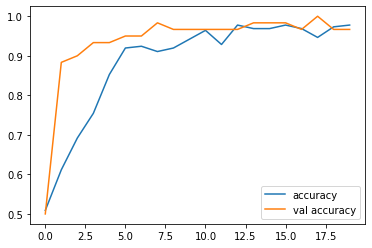

In [42]:
plt.plot(logs['accuracy'],label = 'accuracy')
plt.plot(logs['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()